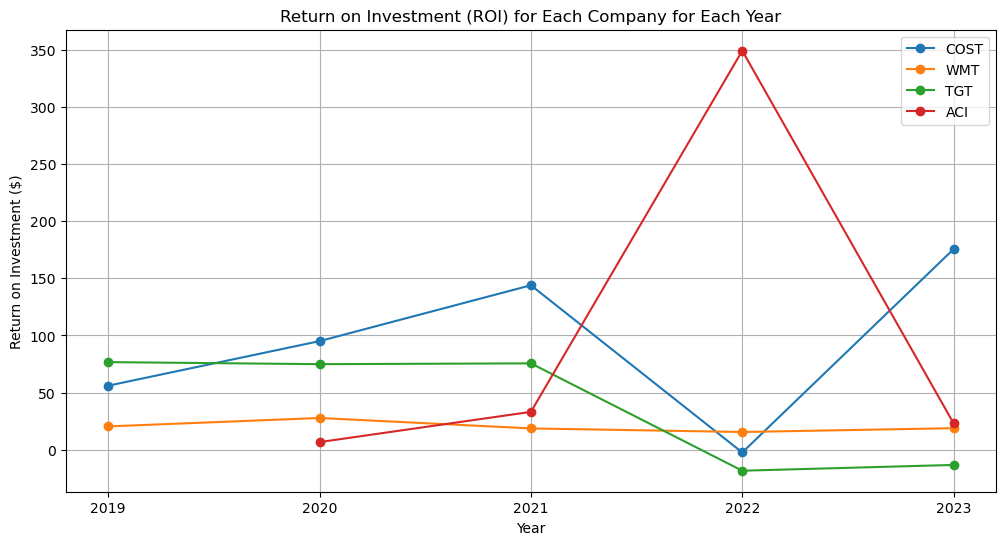

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Read dividend payout data for all four companies
dividend_data_cost = pd.read_csv('COST Dividend Data.csv')
dividend_data_wmt = pd.read_csv('WMT Dividend Data.csv')
dividend_data_tgt = pd.read_csv('TGT Dividend Data.csv')
dividend_data_aci = pd.read_csv('ACI Dividend Data.csv')

# Convert 'Date' column to datetime with correct format for all companies
for df in [dividend_data_cost, dividend_data_wmt, dividend_data_tgt, dividend_data_aci]:
    df['Date'] = pd.to_datetime(df['Date'], format='%d/%m/%Y')

# Read daily stock price data for all four companies
stock_price_data_cost = pd.read_csv('COST.csv')
stock_price_data_wmt = pd.read_csv('WMT.csv')
stock_price_data_tgt = pd.read_csv('TGT.csv')
stock_price_data_aci = pd.read_csv('ACI.csv')

# Convert 'Date' column to datetime with correct format for all companies
for df in [stock_price_data_cost, stock_price_data_wmt, stock_price_data_tgt, stock_price_data_aci]:
    df['Date'] = pd.to_datetime(df['Date'])

# Initialize lists to store ROI for each year
roi_cost_per_year = []
roi_wmt_per_year = []
roi_tgt_per_year = []
roi_aci_per_year = []

# Iterate over each year and calculate ROI for each company for that year
for year in range(2019, 2024): 
for year in range(2019, 2024):    # Filter data for the current year
    merged_data_cost_year = merged_data_cost[merged_data_cost['Date'].dt.year == year]
    merged_data_wmt_year = merged_data_wmt[merged_data_wmt['Date'].dt.year == year]
    merged_data_tgt_year = merged_data_tgt[merged_data_tgt['Date'].dt.year == year]
    merged_data_aci_year = merged_data_aci[merged_data_aci['Date'].dt.year == year]

    # Calculate total payout for all companies for the current year
    total_payout_cost_year = merged_data_cost_year['Dividend_Payout'].sum()
    total_payout_wmt_year = merged_data_wmt_year['Dividend_Payout'].sum()
    total_payout_tgt_year = merged_data_tgt_year['Dividend_Payout'].sum()
    
    # Check if ACI data exists for the current year
    if not merged_data_aci_year.empty:
        total_payout_aci_year = merged_data_aci_year['Dividend_Payout'].sum()
        roi_aci_year = total_payout_aci_year + (merged_data_aci_year.iloc[-1]['Close'] - merged_data_aci_year.iloc[0]['Close'])
        roi_aci_per_year.append(roi_aci_year)
    else:
        roi_aci_per_year.append(None)  # Append None for ACI if data for the year doesn't exist

    # Calculate total return on investment (ROI) for each company for the current year
    # For simplicity, assume ROI is the sum of dividend payout and stock price increase over the period
    roi_cost_year = total_payout_cost_year + (merged_data_cost_year.iloc[-1]['Close'] - merged_data_cost_year.iloc[0]['Close'])
    roi_wmt_year = total_payout_wmt_year + (merged_data_wmt_year.iloc[-1]['Close'] - merged_data_wmt_year.iloc[0]['Close'])
    roi_tgt_year = total_payout_tgt_year + (merged_data_tgt_year.iloc[-1]['Close'] - merged_data_tgt_year.iloc[0]['Close'])

    # Append ROI for each company for the current year to the respective lists
    roi_cost_per_year.append(roi_cost_year)
    roi_wmt_per_year.append(roi_wmt_year)
    roi_tgt_per_year.append(roi_tgt_year)

# Plotting ROI results for each company for each year
years = range(2019, 2024)  # Update the range to include 2019

plt.figure(figsize=(12, 6))

plt.plot(years, roi_cost_per_year, marker='o', label='COST')
plt.plot(years, roi_wmt_per_year, marker='o', label='WMT')
plt.plot(years, roi_tgt_per_year, marker='o', label='TGT')
plt.plot(years, roi_aci_per_year, marker='o', label='ACI')

plt.xlabel('Year')
plt.ylabel('Return on Investment ($)')
plt.title('Return on Investment (ROI) for Each Company for Each Year')
plt.legend()
plt.grid(True)
plt.xticks(years)

# Save the graph as a PNG file
plt.savefig('ROI_Annual.png')

plt.show()
